# This project needs get_dummy and CountVectorizer / TfidfVectorizer before or after tts

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

## Load the Amazon Review data

In [2]:
file_path = r"D:\LIUZHICHENG\Udemy\Machine Learning\Classification Bootmap\ML Classification Package\6. Decision Trees and Random Forest\amazon_alexa.tsv"
df = pd.read_csv(filepath_or_buffer=file_path, sep="\t")
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [3]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

## EDA

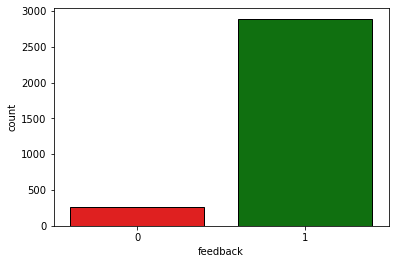

In [4]:
sns.countplot(data=df, x="feedback", palette={0: "red", 1: "green"}, edgecolor="black");

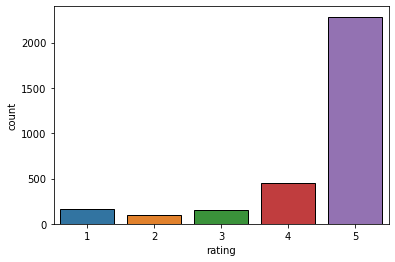

In [5]:
sns.countplot(data=df, x="rating", edgecolor="black");

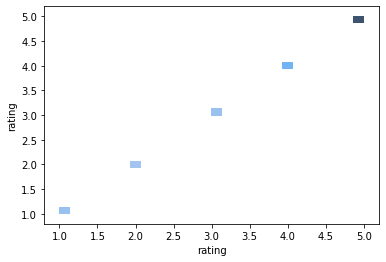

In [6]:
sns.histplot(data=df, x="rating", y="rating");

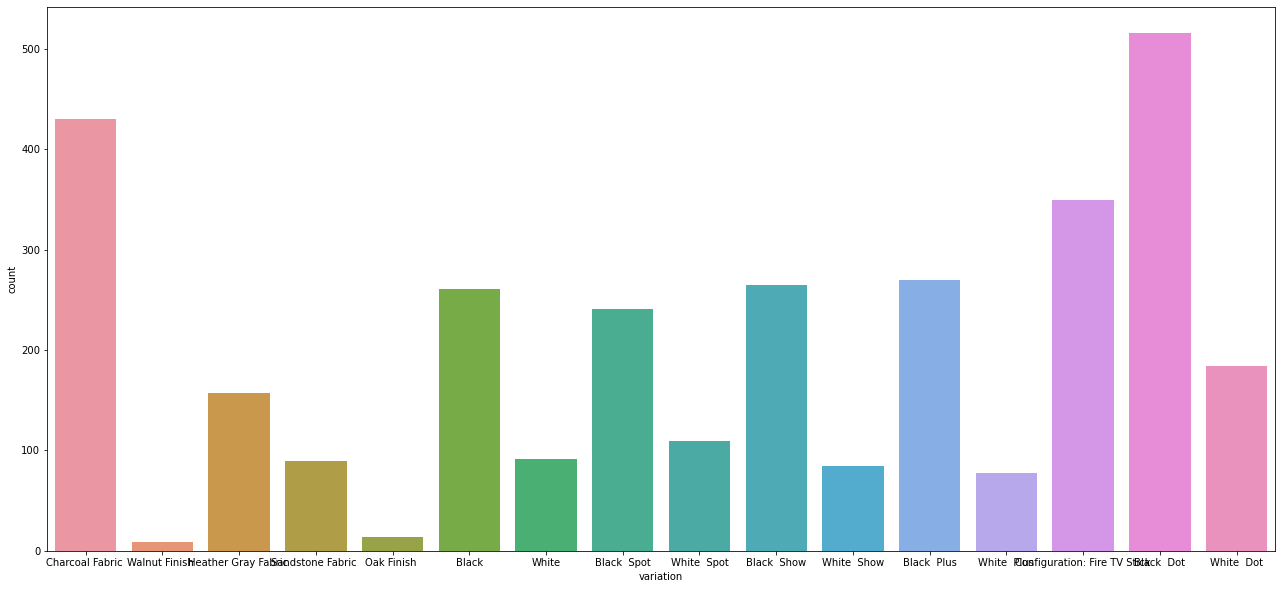

In [7]:
plt.figure(figsize=(22, 10))
sns.countplot(data=df, x="variation");

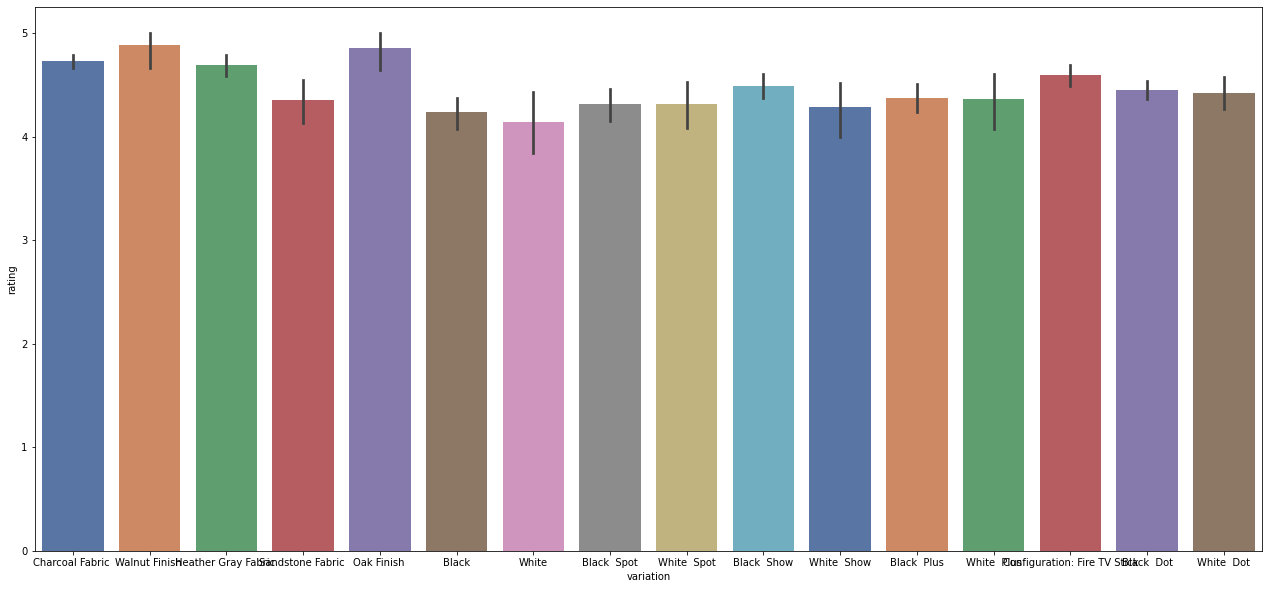

In [8]:
plt.figure(figsize=(22, 10))
sns.barplot(data=df, x="variation", y="rating", palette="deep");

## Data Preprocessing

In [9]:
df.drop(columns=["date", "rating"], inplace=True)
# get dummy for "variation"
df = pd.get_dummies(data=df, columns=["variation"], drop_first=True) # drop_first=True -> dummy trap

In [10]:
# CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

cv = CountVectorizer()
review_cv = cv.fit_transform(df["verified_reviews"])

In [11]:
review_cv.shape

(3150, 4044)

In [12]:
print(cv.get_feature_names())

['00', '000', '07', '10', '100', '100x', '11', '1100sf', '12', '129', '12am', '15', '150', '18', '19', '1964', '1990', '1gb', '1rst', '1st', '20', '200', '2000', '2017', '229', '23', '24', '25', '29', '2nd', '2package', '30', '300', '30pm', '34', '360', '39', '3rd', '3x', '3xs', '40', '45', '48', '4am', '4ghz', '4k', '4th', '50', '54', '5am', '5ghz', '5th', '600', '62', '672', '6th', '70', '75', '79', '80', '80s', '81', '83', '85', '88', '888', '8gb', '90', '91', '911', '99', '_specifically_', 'a1', 'a19', 'abay', 'abc', 'abd', 'abilities', 'ability', 'able', 'abode', 'about', 'above', 'absolutely', 'absolutly', 'ac', 'accent', 'acceptable', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessories', 'accesss', 'accident', 'accidentally', 'accompanying', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'across', 'act', 'acting', 'action', 'actions', 'activat

In [13]:
type(review_cv)

scipy.sparse.csr.csr_matrix

In [14]:
review_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
df = df.drop(columns="verified_reviews")
df.head()

,feedback,variation_Black Dot,variation_Black Plus,variation_Black Show,variation_Black Spot,variation_Charcoal Fabric,variation_Configuration: Fire TV Stick,variation_Heather Gray Fabric,variation_Oak Finish,variation_Sandstone Fabric,variation_Walnut Finish,variation_White,variation_White Dot,variation_White Plus,variation_White Show,variation_White Spot
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [16]:
pd.DataFrame(review_cv.toarray())

,0,1,2,3,4,5,6,7,8,9,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df = pd.concat(objs=[df, pd.DataFrame(review_cv.toarray())], axis=1)
df

,feedback,variation_Black Dot,variation_Black Plus,variation_Black Show,variation_Black Spot,variation_Charcoal Fabric,variation_Configuration: Fire TV Stick,variation_Heather Gray Fabric,variation_Oak Finish,variation_Sandstone Fabric,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
X = df.drop(columns="feedback").to_numpy()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
y = df["feedback"].to_numpy()
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

## Model Training
### CountVectorizer before tts

In [20]:
# Decision Trees
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

predictions = clf_dt.predict(X_test)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.39      0.46      0.42        54
           1       0.95      0.93      0.94       576

    accuracy                           0.89       630
   macro avg       0.67      0.70      0.68       630
weighted avg       0.90      0.89      0.90       630

0.8920634920634921
[[ 25  29]
 [ 39 537]]


In [21]:
# Random Forest
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

predictions = clf_rf.predict(X_test)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.26      0.39        54
           1       0.93      0.99      0.96       576

    accuracy                           0.93       630
   macro avg       0.88      0.63      0.68       630
weighted avg       0.93      0.93      0.92       630

0.9317460317460318
[[ 14  40]
 [  3 573]]


## Model Training
### CountVectorizer after tts

In [22]:
# read csv
df = pd.read_csv(filepath_or_buffer=file_path, sep="\t")
# drop columns, "rating", "date"
df.drop(columns=["rating", "date"], inplace=True)

In [23]:
# get_dummies for "variation"
df = pd.get_dummies(data=df, columns=["variation"], drop_first=True)

In [24]:
X = df.drop(columns="feedback")
y = df["feedback"]

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
X_train.shape

(2520, 16)

In [27]:
X_test.shape

(630, 16)

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X_train_review_cv = cv.fit_transform(raw_documents=X_train["verified_reviews"])
X_test_review_cv = cv.transform(raw_documents=X_test["verified_reviews"])

In [29]:
X_train_review_cv

<2520x3768 sparse matrix of type '<class 'numpy.int64'>'
	with 48718 stored elements in Compressed Sparse Row format>

In [30]:
X_train_review_cv.shape

(2520, 3768)

In [31]:
X_test_review_cv.shape

(630, 3768)

In [32]:
X_train_review_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:
X_test_review_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [34]:
X_train = X_train.drop(columns="verified_reviews").reset_index() # reset_index() for X_train
# concatenate X_train and "review" sparse matrix
X_train = pd.concat(objs=[X_train, pd.DataFrame(X_train_review_cv.toarray())], axis=1)
X_train

,index,variation_Black Dot,variation_Black Plus,variation_Black Show,variation_Black Spot,variation_Charcoal Fabric,variation_Configuration: Fire TV Stick,variation_Heather Gray Fabric,variation_Oak Finish,variation_Sandstone Fabric,...,3758,3759,3760,3761,3762,3763,3764,3765,3766,3767
0,2859,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,793,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2875,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2034,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,493,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,763,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2516,835,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2517,1653,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2518,2607,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
X_test = X_test.drop(columns="verified_reviews").reset_index() # reset_index() for X_test
# concatenate X_test and "review" sparse matrix
X_test = pd.concat(objs=[X_test, pd.DataFrame(X_test_review_cv.toarray())], axis=1)
X_test

,index,variation_Black Dot,variation_Black Plus,variation_Black Show,variation_Black Spot,variation_Charcoal Fabric,variation_Configuration: Fire TV Stick,variation_Heather Gray Fabric,variation_Oak Finish,variation_Sandstone Fabric,...,3758,3759,3760,3761,3762,3763,3764,3765,3766,3767
0,422,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1581,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1185,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,683,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,305,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,1276,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
626,3099,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
627,841,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
628,44,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

predictions = clf_dt.predict(X_test)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.53      0.46      0.50        54
           1       0.95      0.96      0.96       576

    accuracy                           0.92       630
   macro avg       0.74      0.71      0.73       630
weighted avg       0.91      0.92      0.92       630

0.919047619047619
[[ 25  29]
 [ 22 554]]


In [37]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

predictions = clf_rf.predict(X_test)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.65      0.20      0.31        54
           1       0.93      0.99      0.96       576

    accuracy                           0.92       630
   macro avg       0.79      0.60      0.63       630
weighted avg       0.91      0.92      0.90       630

0.9222222222222223
[[ 11  43]
 [  6 570]]


## Model Training
### TfidfVectorizer before tts

In [38]:
# read csv
df = pd.read_csv(filepath_or_buffer=file_path, sep="\t")
# drop columns, "rating", "date"
df.drop(columns=["rating", "date"], inplace=True)

# get_dummies for "variation"
df = pd.get_dummies(data=df, columns=["variation"], drop_first=True)

from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer()
review_tv = tv.fit_transform(raw_documents=df["verified_reviews"])

df = pd.concat(objs=[df, pd.DataFrame(review_tv.toarray())], axis=1)
df.drop(columns="verified_reviews", inplace=True)

X = df.drop(columns="feedback")
y = df["feedback"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

predictions = clf_dt.predict(X_test)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.38      0.46      0.42        54
           1       0.95      0.93      0.94       576

    accuracy                           0.89       630
   macro avg       0.67      0.70      0.68       630
weighted avg       0.90      0.89      0.90       630

0.8904761904761904
[[ 25  29]
 [ 40 536]]


In [40]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

predictions = clf_rf.predict(X_test)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.22      0.35        54
           1       0.93      0.99      0.96       576

    accuracy                           0.93       630
   macro avg       0.87      0.61      0.66       630
weighted avg       0.92      0.93      0.91       630

0.9285714285714286
[[ 12  42]
 [  3 573]]


## Model Training
### TfidfVectorizer after tts

In [41]:
# read csv
df = pd.read_csv(filepath_or_buffer=file_path, sep="\t")
# drop columns, "rating", "date"
df.drop(columns=["rating", "date"], inplace=True)

# get_dummies for "variation"
df = pd.get_dummies(data=df, columns=["variation"], drop_first=True)

X = df.drop(columns="feedback")
y = df["feedback"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer()
X_train_review_tv = tv.fit_transform(raw_documents=X_train["verified_reviews"])
X_test_review_tv = tv.transform(raw_documents=X_test["verified_reviews"])

X_train = X_train.drop(columns="verified_reviews").reset_index() # reset_index() for X_train
# concatenate X_train and "review" sparse matrix
X_train = pd.concat(objs=[X_train, pd.DataFrame(X_train_review_cv.toarray())], axis=1)

X_test = X_test.drop(columns="verified_reviews").reset_index() # reset_index() for X_test
# concatenate X_test and "review" sparse matrix
X_test = pd.concat(objs=[X_test, pd.DataFrame(X_test_review_cv.toarray())], axis=1)

In [42]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

predictions = clf_dt.predict(X_test)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.58      0.46      0.52        54
           1       0.95      0.97      0.96       576

    accuracy                           0.93       630
   macro avg       0.77      0.72      0.74       630
weighted avg       0.92      0.93      0.92       630

0.9253968253968254
[[ 25  29]
 [ 18 558]]


In [43]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

predictions = clf_rf.predict(X_test)
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.63      0.22      0.33        54
           1       0.93      0.99      0.96       576

    accuracy                           0.92       630
   macro avg       0.78      0.61      0.64       630
weighted avg       0.91      0.92      0.90       630

0.9222222222222223
[[ 12  42]
 [  7 569]]
